In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
import pickle
#读取数据集
df = pd.read_csv('./transaction_dataset.csv',index_col=0)
df.sample(3)  #随机获取3条数据以list形式返回

Index                                     Address  FLAG  \
4164   1232  0x6ede0f194e5734d5a944ef5f78ee4f7570245a09     0   
9837   2176  0xff718805bb9199ebf024ab6acd333e603ad77c85     1   
7407   4475  0xc7210e1a1d66e9f184bebebd2e04eaf4cf0b20f7     0   

      Avg min between sent tnx  Avg min between received tnx  \
4164                      0.00                           0.0   
9837                      0.00                           0.0   
7407                     23.21                           0.0   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
4164                                     2.12         1             1   
9837                                     0.00         0             0   
7407                                    69.63         3             1   

      Number of Created Contracts  Unique Received From Addresses  ...  \
4164                            0                               1  ...   
9837                            0                               0  ...   
7407                            0                               1  ...   

       ERC20 min val sent   ERC20 max val sent   ERC20 avg val sent  \
4164                  0.0                  0.0                  0.0   
9837                  0.0                  0.0                  0.0   
7407                  0.0                  0.0                  0.0   

       ERC20 min val sent contract   ERC20 max val sent contract  \
4164                           0.0                           0.0   
9837                           0.0                           0.0   
7407                           0.0                           0.0   

       ERC20 avg val sent contract   ERC20 uniq sent token name  \
4164                           0.0                          0.0   
9837                           0.0                          0.0   
7407                           0.0                          0.0   

       ERC20 uniq rec token name   ERC20 most sent token type  \
4164                         0.0                            0   
9837                         1.0                                
7407                         0.0                            0   

       ERC20_most_rec_token_type  
4164                           0  
9837       Blockwell say NOTSAFU  
7407                           0  

[3 rows x 50 columns]

In [4]:
df.shape
df= df.iloc[:,2:]  #切片，获取所有行；从第2列开始到结尾



In [5]:
from pycaret.classification import *  #pycaret 低代码工具

In [6]:
setup(df,target="FLAG",session_id=84)

In [7]:
# compare_models()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [9]:
for col in df:print(f'{col} : {len(df[col].unique())}')

FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg time between rec tnx : 2
 ERC20 avg time between 

In [10]:
df.select_dtypes(include=['float','int']).describe()  # 统计

FLAG  Avg min between sent tnx  Avg min between received tnx  \
count  9841.000000               9841.000000                   9841.000000   
mean      0.221421               5086.878721                   8004.851184   
std       0.415224              21486.549974                  23081.714801   
min       0.000000                  0.000000                      0.000000   
25%       0.000000                  0.000000                      0.000000   
50%       0.000000                 17.340000                    509.770000   
75%       0.000000                565.470000                   5480.390000   
max       1.000000             430287.670000                 482175.490000   

       Time Diff between first and last (Mins)      Sent tnx  Received Tnx  \
count                             9.841000e+03   9841.000000   9841.000000   
mean                              2.183333e+05    115.931714    163.700945   
std                               3.229379e+05    757.226361    940.836550   
min                               0.000000e+00      0.000000      0.000000   
25%                               3.169300e+02      1.000000      1.000000   
50%                               4.663703e+04      3.000000      4.000000   
75%                               3.040710e+05     11.000000     27.000000   
max                               1.954861e+06  10000.000000  10000.000000   

       Number of Created Contracts  Unique Received From Addresses  \
count                  9841.000000                     9841.000000   
mean                      3.729702                       30.360939   
std                     141.445583                      298.621112   
min                       0.000000                        0.000000   
25%                       0.000000                        1.000000   
50%                       0.000000                        2.000000   
75%                       0.000000                        5.000000   
max                    9995.000000                     9999.000000   

       Unique Sent To Addresses  min value received  ...   ERC20 max val rec  \
count               9841.000000         9841.000000  ...        9.012000e+03   
mean                  25.840159           43.845153  ...        1.252524e+08   
std                  263.820410          325.929139  ...        1.053741e+10   
min                    0.000000            0.000000  ...        0.000000e+00   
25%                    1.000000            0.001000  ...        0.000000e+00   
50%                    2.000000            0.095856  ...        0.000000e+00   
75%                    3.000000            2.000000  ...        9.900000e+01   
max                 9287.000000        10000.000000  ...        1.000000e+12   

        ERC20 avg val rec   ERC20 min val sent   ERC20 max val sent  \
count        9.012000e+03         9.012000e+03         9.012000e+03   
mean         4.346203e+06         1.174126e+04         1.303594e+07   
std          2.141192e+08         1.053567e+06         1.179905e+09   
min          0.000000e+00         0.000000e+00         0.000000e+00   
25%          0.000000e+00         0.000000e+00         0.000000e+00   
50%          0.000000e+00         0.000000e+00         0.000000e+00   
75%          2.946467e+01         0.000000e+00         0.000000e+00   
max          1.724181e+10         1.000000e+08         1.120000e+11   

        ERC20 avg val sent   ERC20 min val sent contract  \
count         9.012000e+03                        9012.0   
mean          6.318389e+06                           0.0   
std           5.914764e+08                           0.0   
min           0.000000e+00                           0.0   
25%           0.000000e+00                           0.0   
50%           0.000000e+00                           0.0   
75%           0.000000e+00                           0.0   
max           5.614756e+10                           0.0   

        ERC20 max val sent contract   ERC20 avg val sent contract  \
count 

In [11]:
df['FLAG'].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [12]:
fig = px.pie(df, values=df['FLAG'].value_counts().values, names=df['FLAG'].value_counts() ,
             title='Target distribution of being Fraud or not',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [13]:
print(f'非欺诈案件的百分比: {len(df.loc[df["FLAG"]==0])/len(df["FLAG"])*100}')
print(f'欺诈案件的百分比 : {len(df.loc[df["FLAG"]==1])/len(df["FLAG"])*100}')

非欺诈案件的百分比: 77.85794126613149
欺诈案件的百分比 : 22.14205873386851


In [14]:
#-将处理缺失值的数据
df.isnull().sum()   # 统计为null的值
#将对象变量转换为“类别category”数据类型以提高计算效率
categories = df.select_dtypes('O').columns.astype('category')  
df[categories]
#去掉两个分类特征
df.drop(df[categories], axis=1, inplace=True) 
#用中值替换数字变量的缺失fillna（）缺失值的填充
df.fillna(df.median(), inplace=True)  
df.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [15]:
#删除方差为0的特征
no_var = df.var() == 0
df.var()[no_var]
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
df.shape
# df.info() 
#  -----截止现在，去掉了最后两个值不为数值的特征 和 方差为0的特征


(9841, 39)

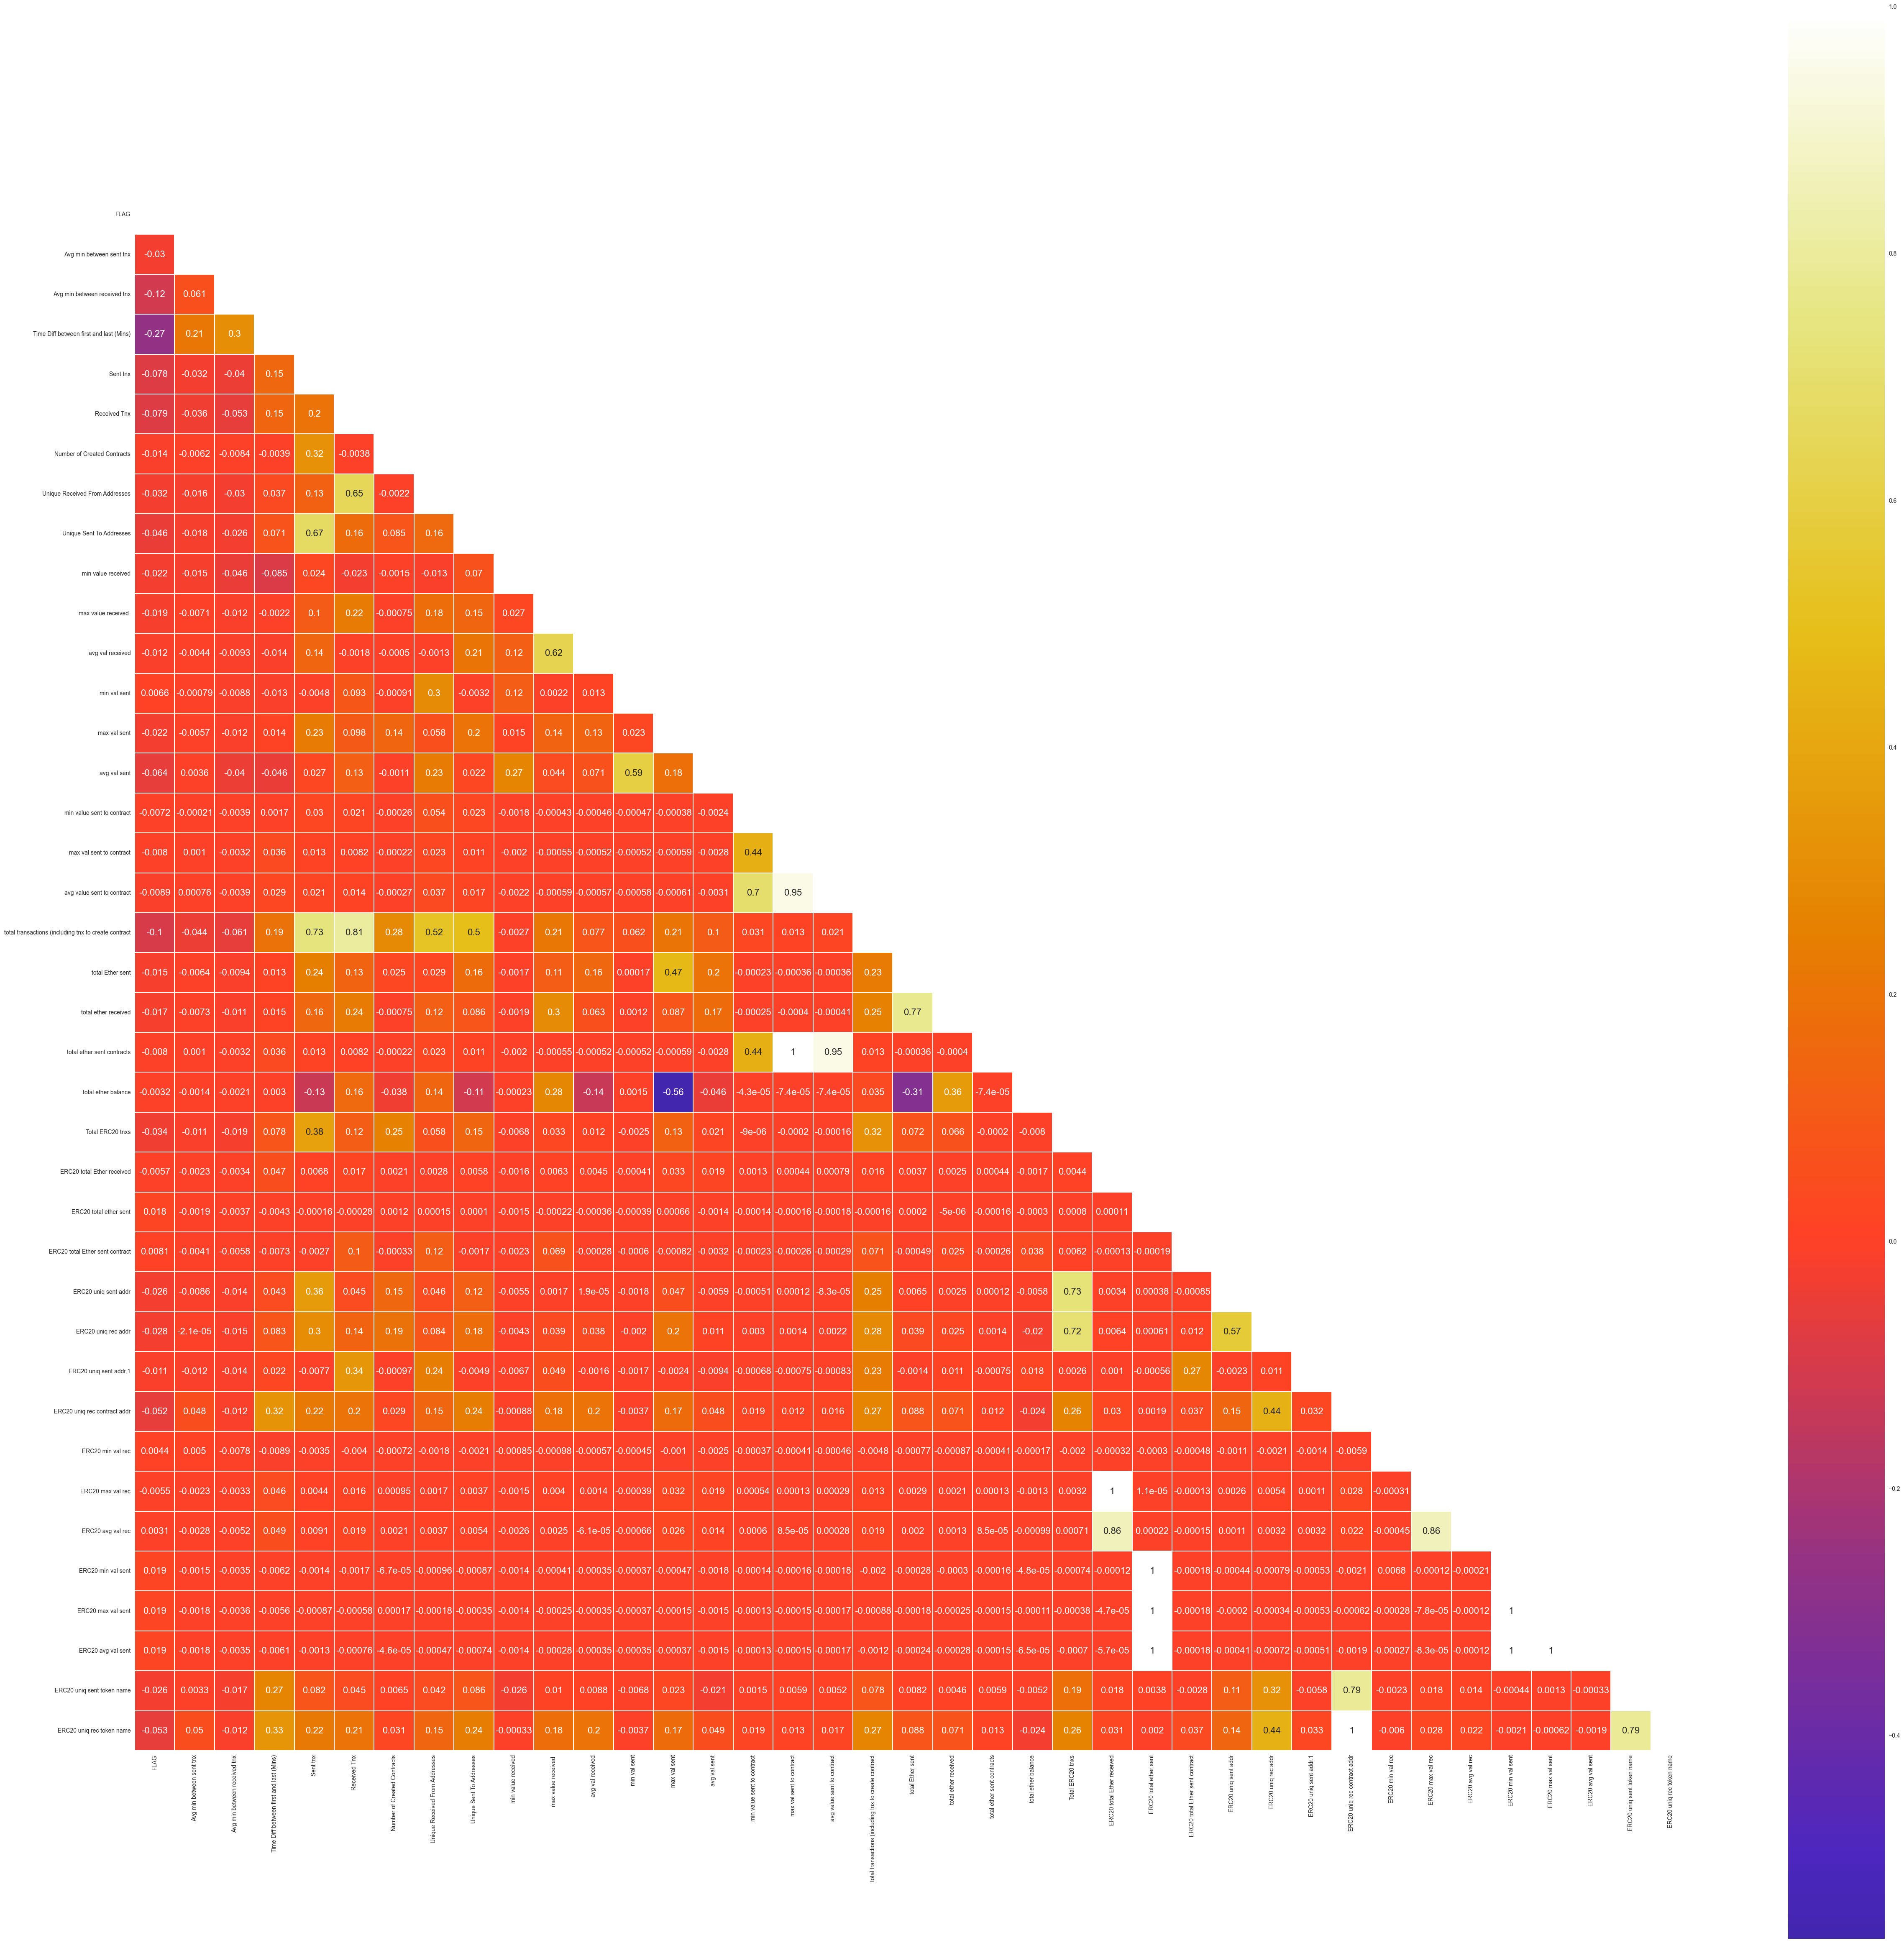

In [16]:
# 构造特征之间的相关关系矩阵
corr = df.corr()  # corr()相关关系矩阵
mask = np.zeros_like(corr) #创造一个和corr一样结构的数据，但是元素是0
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(60,60))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', 
                center=0, linewidths=0.1, square=True,annot_kws={"size": 16})

In [17]:
soretd_corr=corr.sort_values(by=['FLAG'],key=abs) #根据flag进行相关关系排序
soretd_corr

FLAG  \
 ERC20 avg val rec                                  0.003132   
total ether balance                                -0.003229   
 ERC20 min val rec                                  0.004434   
 ERC20 max val rec                                 -0.005510   
 ERC20 total Ether received                        -0.005711   
min val sent                                        0.006626   
min value sent to contract                         -0.007213   
max val sent to contract                           -0.007988   
total ether sent contracts                         -0.007988   
 ERC20 total Ether sent contract                    0.008127   
avg value sent to contract                         -0.008883   
 ERC20 uniq sent addr.1                            -0.011148   
avg val received                                   -0.011881   
Number of Created Contracts                        -0.013711   
total Ether sent                                   -0.014993   
total ether received                               -0.016900   
 ERC20 total ether sent                             0.018428   
 ERC20 max val sent                                 0.018770   
 ERC20 avg val sent                                 0.018835   
 ERC20 min val sent                                 0.019023   
max value received                                 -0.019259   
min value received                                 -0.021641   
max val sent                                       -0.022437   
 ERC20 uniq sent addr                              -0.025746   
 ERC20 uniq sent token name                        -0.026290   
 ERC20 uniq rec addr                               -0.027732   
Avg min between sent tnx                           -0.029754   
Unique Received From Addresses                     -0.031941   
 Total ERC20 tnxs                                  -0.034132   
Unique Sent To Addresses                           -0.045584   
 ERC20 uniq rec contract addr                      -0.052473   
 ERC20 uniq rec token name                         -0.052603   
avg val sent                                       -0.063556   
Sent tnx                                           -0.078006   
Received Tnx                                       -0.079316   
total transactions (including tnx to create con... -0.100289   
Avg min between received tnx                       -0.118533   
Time Diff between first and last (Mins)            -0.269354   
FLAG                                                1.000000   

                                                    Avg min between sent tnx  \
 ERC20 avg val rec                                                 -0.002829   
total ether balance                                                -0.001425   
 ERC20 min val rec                                                  0.004998   
 ERC20 max val rec                                                 -0.002260   
 ERC20 total Ether received                                        -0.002339   
min val sent                                                       -0.000789   
min value sent to contract                                         -0.000210   
max val sent to contract                                            0.001044   
total ether sent contracts                                          0.001044   
 ERC20 total Ether sent contract                                   -0.004101   
avg value sent to contract                                          0.000759   
 ERC20 uniq sent addr.1                                            -0.011862   
avg val received                                                   -0.004382   
Number of Created Contracts                                        -0.006186   
total Ether sent                                                   -0.006440   
total ether received                                               -0.007285   
 ERC20 total ether sent                                            -0.001916   
 ERC20 max val sent                                    

In [18]:
corr['min value received'] # 和当前特征相关联的特征
#------删除其中一个高度相关的功能
drop = ['total transactions (including tnx to create contract',
        'total ether sent contracts', 
        'max val sent to contract',
        ' ERC20 avg val rec',
        ' ERC20 avg val rec',
        ' ERC20 max val rec', 
        ' ERC20 min val rec', 
        ' ERC20 uniq rec contract addr', 
        'max val sent', 
        ' ERC20 avg val sent',
        ' ERC20 min val sent', 
        ' ERC20 max val sent', 
        ' Total ERC20 tnxs', 
        'avg value sent to contract', 
        'Unique Sent To Addresses',
        'Unique Received From Addresses', 
        'total ether received', 
        ' ERC20 uniq sent token name', 
        'min value received', 
        'min val sent', 
        ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)

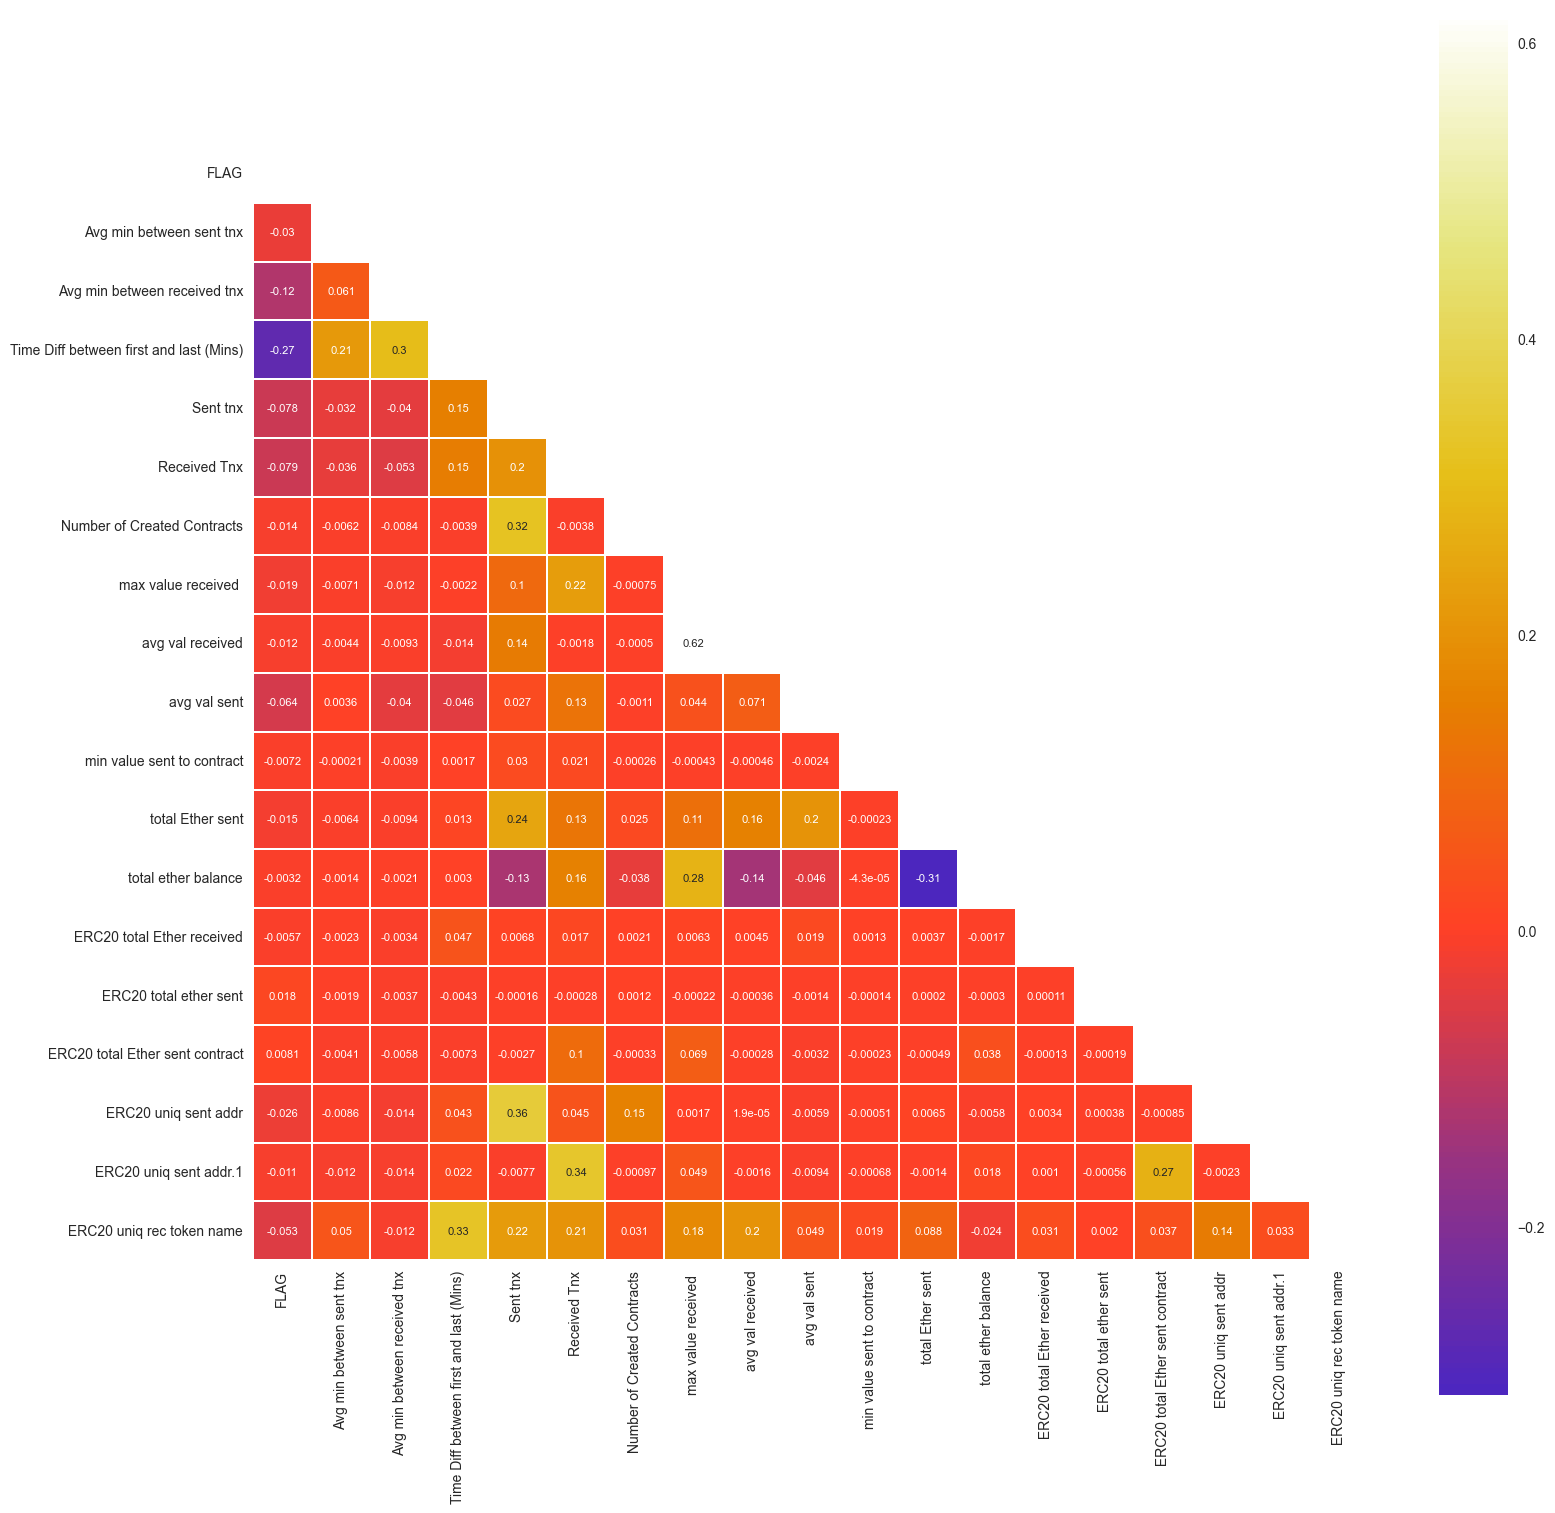

In [19]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,18))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 8})

In [20]:
columns = df.columns
#----删除值的统计数小于10的特征
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')
drops = ['min value sent to contract', ' ERC20 uniq sent addr.1']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()  # 只剩下17个特征

The column min value sent to contract has the following distribution: 
0.00    9839
0.02       1
0.01       1
Name: min value sent to contract, dtype: int64
The column  ERC20 uniq sent addr.1 has the following distribution: 
0.0    9813
1.0      26
3.0       1
2.0       1
Name:  ERC20 uniq sent addr.1, dtype: int64
(9841, 17)


FLAG  Avg min between sent tnx  Avg min between received tnx  \
0     0                    844.26                       1093.71   
1     0                  12709.07                       2958.44   
2     0                 246194.54                       2434.02   
3     0                  10219.60                      15785.09   
4     0                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30         2            10   
3                                397555.90        25             9   
4                                382472.42      4598            20   

   Number of Created Contracts  max value received   avg val received  \
0                            0            45.806785          6.589513   
1                            0             2.613269          0.385685   
2                            0             1.165453          0.358906   
3                            0           500.000000         99.488840   
4                            1            12.802411          2.671095   

   avg val sent  total Ether sent  total ether balance  \
0      1.200681        865.691093          -279.224419   
1      0.032844          3.087297            -0.001819   
2      1.794308          3.588616             0.000441   
3     70.001834       1750.045862          -854.646303   
4      0.022688        104.318883           -50.896986   

    ERC20 total Ether received   ERC20 total ether sent  \
0                 3.558854e+07             3.560317e+07   
1                 4.034283e+02             2.260809e+00   
2                 5.215121e+02             0.000000e+00   
3                 1.711105e+04             1.141223e+04   
4                 1.628297e+05             1.235399e+05   

    ERC20 total Ether sent contract   ERC20 uniq sent addr  \
0                               0.0                   30.0   
1                               0.0                    1.0   
2                               0.0                    0.0   
3                               0.0                    2.0   
4                               0.0                    4.0   

    ERC20 uniq rec token name  
0                        57.0  
1                         7.0  
2                         8.0  
3                        11.0  
4                        27.0

In [21]:
#----开始训练
X = df.iloc[:, 1:]  #待划分的样本特征集合
y = df.iloc[:, 0]

print(X.shape, y.shape)
# 训练集 (80%)  测试集 (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(9841, 16) (9841,)
(7872, 16) (7872,)
(1969, 16) (1969,)


In [22]:
#---数据归一化，标准化
sc = StandardScaler()
sc_train = sc.fit_transform(X_train)
sc_df = pd.DataFrame(sc_train, columns=X_train.columns)
sc_df

Avg min between sent tnx  Avg min between received tnx  \
0                    -0.038167                      0.310581   
1                    -0.238842                     -0.339707   
2                    -0.238088                     -0.322958   
3                    -0.238842                      0.503169   
4                    -0.231326                     -0.339693   
...                        ...                           ...   
7867                 -0.238842                     -0.320304   
7868                 -0.160852                     -0.250448   
7869                 -0.238842                     -0.339707   
7870                  0.116065                      0.012046   
7871                 -0.238842                     -0.271446   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                    2.851119  0.001530     -0.133464   
1                                   -0.675810 -0.153323     -0.176780   
2                                    1.063494  1.620329      1.238207   
3                                   -0.553119 -0.153323     -0.174717   
4                                   -0.674831 -0.150720     -0.174717   
...                                       ...       ...           ...   
7867                                -0.672906 -0.152022     -0.174717   
7868                                 0.336370 -0.140310     -0.024143   
7869                                -0.675610 -0.152022     -0.175749   
7870                                -0.061022 -0.140310     -0.161310   
7871                                 0.024700 -0.153323     -0.031362   

      Number of Created Contracts  max value received   avg val received  \
0                       -0.025638            -0.031784         -0.130116   
1                       -0.025638            -0.043658         -0.183336   
2                       -0.025638            -0.041094         -0.182633   
3                       -0.018987            -0.043563         -0.182076   
4                       -0.025638            -0.038450         -0.055912   
...                           ...                  ...               ...   
7867                    -0.025638            -0.043444         -0.179100   
7868                    -0.025638            -0.042296         -0.179728   
7869                    -0.025638            -0.043642         -0.182894   
7870                    -0.025638             0.158200          0.187543   
7871                    -0.018987            -0.043584         -0.182561   

      avg val sent  total Ether sent  total ether balance  \
0        -0.170156         -0.026374            -0.008354   
1        -0.209762         -0.028905            -0.007921   
2        -0.208458         -0.027951            -0.007905   
3        -0.209762         -0.028905            -0.007917   
4         0.027769         -0.028650            -0.007921   
...            ...               ...                  ...   
7867     -0.193976         -0.028896            -0.007921   
7868     -0.110226         -0.028370            -0.007921   
7869     -0.208949         -0.028904            -0.007921   
7870      0.827274         -0.023335            -0.007921   
7871     -0.209762         -0.028905            -0.007759   

       ERC20 total Ether received   ERC20 total ether sent  \
0                       -0.051039                -0.011875   
1                       -0.052388                -0.012140   
2                       -0.052388                -0.012140   
3                       -0.052388                -0.012140   
4                       -0.052388                -0.012140   
...                           ...                      ...   
7867                    -0.052388                -0.012140   
7868                    -0.052381                -0.012140   
7869                    -0.052388                -0.012140   
7870                    -0.052386                -0.012140   
7871                    -0.05238

In [23]:
#---使用SMOTE进行过采样
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {sc_train.shape, y_train.shape}')
x_tr_resample, y_tr_resample = oversample.fit_resample(sc_train, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')
#-----SMOTE之前的目标分布
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# -----SMOTE之后的目标分布
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')

Shape of the training before SMOTE: ((7872, 16), (7872,))
Shape of the training after SMOTE: ((12230, 16), (12230,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6115 
 	Fauds: 1757
AFTER OVERSAMPLING 
 	Non-frauds: 6115 
 	Fauds: 6116


In [24]:
#-----Logistic Regression, Random Forest &  XGBoost
LR = LogisticRegression(random_state=42)
LR.fit(x_tr_resample, y_tr_resample)  #参数：训练数据、训练标签
# Transform test features
sc_test = sc.transform(X_test)
preds = LR.predict(sc_test)
print(y_test.shape)
y_test.value_counts()
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

(1969,)
              precision    recall  f1-score   support

           0       0.94      0.54      0.68      1547
           1       0.34      0.87      0.49       422

    accuracy                           0.61      1969
   macro avg       0.64      0.70      0.59      1969
weighted avg       0.81      0.61      0.64      1969

[[834 713]
 [ 55 367]]


In [25]:
RF = RandomForestClassifier(random_state=42)
RF.fit(x_tr_resample, y_tr_resample)
preds_RF = RF.predict(sc_test)

print(classification_report(y_test, preds_RF))
print(confusion_matrix(y_test, preds_RF))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1547
           1       0.92      0.95      0.93       422

    accuracy                           0.97      1969
   macro avg       0.95      0.96      0.96      1969
weighted avg       0.97      0.97      0.97      1969

[[1514   33]
 [  23  399]]


In [26]:
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(x_tr_resample, y_tr_resample)
preds_xgb = xgb_c.predict(sc_test)

print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1547
           1       0.93      0.95      0.94       422

    accuracy                           0.97      1969
   macro avg       0.96      0.96      0.96      1969
weighted avg       0.97      0.97      0.97      1969

[[1515   32]
 [  21  401]]


In [27]:
#  超参数 GridSearchCV 网格搜索 --自动调参利器，适合数据集较少的
params_grid = {'learning_rate':[0.01, 0.1, 0.5],
              'n_estimators':[100,200],
              'subsample':[0.5, 0.9],
               'max_depth':[3,4],
               'colsample_bytree':[0.3,0.7]}

grid = GridSearchCV(estimator=xgb_c, param_grid=params_grid, scoring='recall', cv = 10, verbose = 0)

grid.fit(x_tr_resample, y_tr_resample)
print(f'XGBoost参数: {grid.best_params_}')
print(f'回召率: {grid.best_score_}')

XGBoost参数: {'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.5}
回召率: 0.9847822598761272


In [28]:
preds_best_xgb = grid.best_estimator_.predict(sc_test)
print(classification_report(y_test, preds_best_xgb))
print(confusion_matrix(y_test, preds_best_xgb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1547
           1       0.93      0.95      0.94       422

    accuracy                           0.97      1969
   macro avg       0.96      0.96      0.96      1969
weighted avg       0.97      0.97      0.97      1969

[[1519   28]
 [  23  399]]


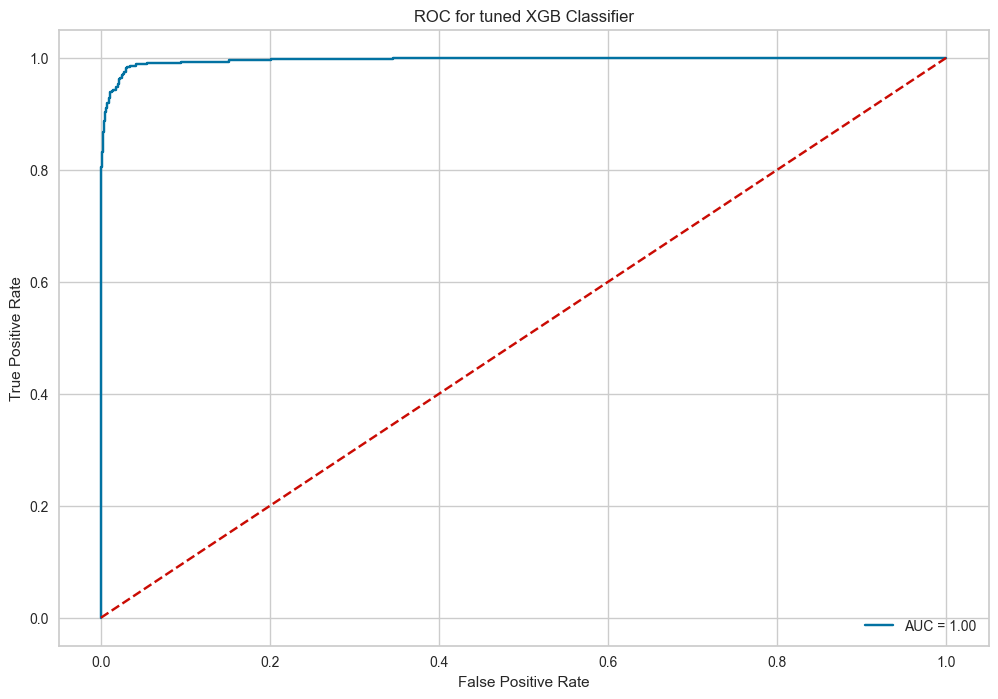

In [39]:
# Plotting AUC for untuned XGB Classifier
probs = xgb_c.predict_proba(sc_test)
pred = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.title('ROC for tuned XGB Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()